### NBA 득점예측

#### Features
         
-  team_abbreviation: 팀 약어
-  age: 나이               
-  player_height: 선수 키     
-  player_weight: 선수 몸무게                              
-  draft_round: 드래프트 라운드       
-  draft_number: 드래프트 번호       
-  gp: 경기 수 (games played)                             
-  reb: 리바운드 수 (rebounds)                
-  ast: 어시스트 수 (assists)                
-  net_rating: 넷 레이팅 (팀이 코트에 있을 때의 순 득실점)         
-  oreb_pct: 공격 리바운드 비율 (offensive rebound percentage)           
-  dreb_pct: 수비 리바운드 비율 (defensive rebound percentage)           
-  usg_pct: 사용률 (usage percentage, 선수가 팀의 공격에서 차지하는 비율)            
-  ts_pct: 슈팅 성공률 (true shooting percentage, 효율적인 슈팅 성공률)             
-  ast_pct: 어시스트 비율 (assist percentage, 팀의 필드골 중 이 선수가 어시스트한 비율)            

#### Target

-  pts: 득점 (points)

---

- 데이터에 결측지, 중복행 X

- 먼저 전체 모델들을 이용하여 선형 회귀 예측을 수행
<img src='./image/nba01.png'>

- LinearRegression 의 R2가 0.9089로 매우 높은수치를 보이고 있어 과적합 가능성이 있고 확인필요



- Kfold cross_val_score를 통한 비교
<img src='./image/nba03.png'>

-  Pytorch를 통해 loss를 통한 비교
<img src='./image/nba02.png'>

-  LinearRegression 사용하였을때 학습데이터와 테스트 데이터의 대한 예측값
<img src='./image/nba04.png'>

---
#### 최적의 모델찾기

- Pipeline을 통해 StandardScaler 및 차원축소(2차원) 진행

- LGBMRegressor 모델을 통해 차원축소 적용

- Ridge 사용하여 규제적용(alpha=4000)

- Ridge 사용하여 규제적용(alpha=4000) 및 차원축소(2차원)

<img src='./image/nba05.png'>

/nba05.png'>



In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 모델과 성능 지표를 리스트 형태로 준비
models = [
    "MSE", "RMSE", 
    "R2"
]

zLGBM = [ 0.0179,  0.1337,  0.9836]
D2LGBM =[  0.2777,  0.5270,  0.7456]
Ridge = [ 0.1526,  0.3906,  0.8603]
D2Ridge  = [  0.3254,  0.5704,  0.7020]

# 데이터를 numpy 배열로 변환
data = np.array([LGBM, D2LGBM, Ridge,D2Ridge])

# 성능 지표의 이름
metrics = ['LGBM', 'D2LGBM', 'Ridge','D2Ridge', ]

# 그래프 그리기 설정
n_groups = len(models)
fig, ax = plt.subplots(figsize=(14, 8))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

# 각 지표별로 바 그래프를 그림
for i in range(data.shape[0]):
    plt.bar(index + i*bar_width, data[i], bar_width, alpha=opacity, label=metrics[i])

# 제목, 레이블, 범례 설정
plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Performance comparison of different models', fontsize=16)
plt.xticks(index + 1.5*bar_width, models, rotation=45)
plt.legend()

# 그리드 표시
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()


SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (2810573712.py, line 10)

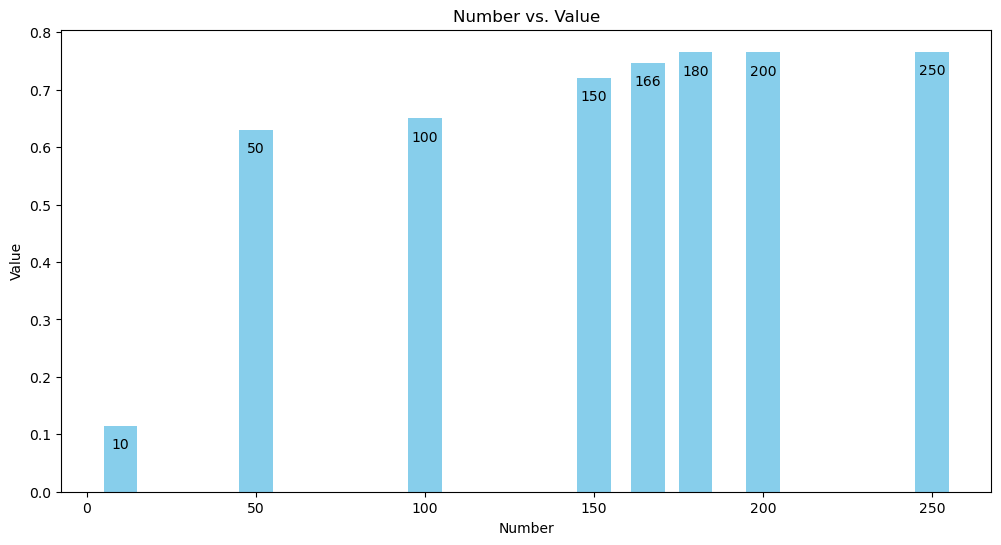

In [6]:
import matplotlib.pyplot as plt

# 데이터
numbers = [10, 50, 100, 150, 166, 180, 200, 250]
values = [0.1144, 0.6301, 0.6501, 0.7209, 0.7474, 0.7651, 0.7650, 0.7663]

# 바 그래프 생성
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
bars = plt.bar(numbers, values, color='skyblue', width=10)  # width 조정

# 각 막대 아래에 숫자 표시
for bar, number in zip(bars, numbers):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.02, str(number), ha='center', va='top')

# 그래프 제목 및 축 레이블
plt.title('Number vs. Value')
plt.xlabel('Number')
plt.ylabel('Value')

# 그래프 보이기
plt.show()
